# Telco Customer Churn Analysis 
Customer churn measures the number of clients who discontinue a service (cellphone plan, bank account, SaaS application...) or stop buying products (retail, e-commerce...) in a given time period. This dataset for Telecom customer churn is picked up from [IBM Watson Sample datasets](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/). 

This dataset contains total 7043 records. Each record is unique for a customer identified using feature customerID. Here the target column on which we will peform classification is Churn which tells whether customer churn or not. Dataset contain total 21 columns whose details are below: 

__customerID__ - Customer ID uniquly identifying record of a customer

__gender__ - Customer gender (female, male)

__SeniorCitizen__ - Whether the customer is a senior citizen or not (1, 0)

__Partner__ - Whether the customer has a partner or not (Yes, No)

__Dependents__ - Whether the customer has dependents or not (Yes, No)

__tenure__ - Number of months the customer has stayed with the company

__PhoneService__ - Whether the customer has a phone service or not (Yes, No)

__MultipleLines__ - Whether the customer has multiple lines or not (Yes, No, No phone service)

__InternetService__ - Customer’s internet service provider (DSL, Fiber optic, No)

__OnlineSecurity__ - Whether the customer has online security or not (Yes, No, No internet service)

__OnlineBackup__ - Whether the customer has online backup or not (Yes, No, No internet service)

__DeviceProtection__ - Whether the customer has device protection or not (Yes, No, No internet service)

__TechSupport__ - Whether the customer has tech support or not (Yes, No, No internet service)

__StreamingTV__ - Whether the customer has streaming TV or not (Yes, No, No internet service)

__StreamingMovies__ - Whether the customer has streaming movies or not (Yes, No, No internet service)

__Contract__ -The contract term of the customer (Month-to-month, One year, Two year)

__PaperlessBilling__ - Whether the customer has paperless billing or not (Yes, No)

__PaymentMethod__ - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

__MonthlyCharges__ - The amount charged to the customer monthly

__TotalCharges__ - The total amount charged to the customer

__Churn__ -Whether the customer churned or not (Yes or No)

### Import libraries and dataset

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

plt.style.use('fivethirtyeight')

In [2]:
#import the dataset
data = pd.read_csv('./Telco-Customer-Churn.csv')
#snapshot of data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#column datatypes
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

1. #### Here by going through data description, we have 4 numeric variables and 17 categorical variables(including target).

### Exploratory Data Analysis

In [4]:
#counts of customer churn cases vs not churn in dataset
target= data['Churn'].value_counts()

print(data["gender"].value_counts().keys())
levels = ['No','Yes']
trace = go.Pie(labels=target.index,values=target.values,
               marker=dict(colors=('orange','green')))
layout = dict(title="Telco Customer Churn Ratio", margin=dict(l=150), width=500, height=500)
figdata = [trace]
fig = go.Figure(data=figdata, layout=layout)
iplot(fig)

#print target class counts
print(target)


Index(['Male', 'Female'], dtype='object')


No     5174
Yes    1869
Name: Churn, dtype: int64


In pie-chart, we can see from data we have, 26.5% of total customers in dataset churn. 

In [5]:
#Let's visualize the churn on the basis of Gender
     
    
def bar_plot(col,data,barmode='group',width=800,height=600,color1='orange',color2='purple'):
    values = list(data[col].value_counts().keys())
    #values[0]=male
   
    tr1 = data[data[col]==values[0]]['Churn'].value_counts()
    print(type(tr1))
    tr2 = data[data[col]==values[1]]['Churn'].value_counts()
    
    trace1 = go.Bar(y=[tr1[0],tr2[0]], name="Not Churn", x=values, marker=dict(color=color1))
    trace2 = go.Bar(y=[tr1['Yes'], tr2['Yes']], name="Churn", x=values, marker=dict(color=color2))
    data = [trace1,trace2]
    layout = go.Layout(
        barmode=barmode,xaxis = dict(title=col),yaxis=dict(title='Count'),
    title='Effect of '+ col + ' on Customer Churn',width=width,height=height)
   
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


In [6]:
#Comparison of churn between male and female
bar_plot('gender',data)


<class 'pandas.core.series.Series'>


There is almost no difference in churn ratio for male and female.

In [7]:
#Let's visualize the churn ratio for senior citizens
bar_plot('SeniorCitizen',data)

<class 'pandas.core.series.Series'>


In [8]:
#Let's visualize the churn ratio for senior citizens
bar_plot('SeniorCitizen',data,barmode='stack',width=600,height=400,color1='orange',color2='green')

<class 'pandas.core.series.Series'>


Churn rate for senior citizens is significanlty higher as compared to non-senior citizens.

In [9]:
#let's visualize the impact of having partner on customer churn
bar_plot('Partner',data,barmode='stack',width=600,height=400,color1='blue',color2='pink')

<class 'pandas.core.series.Series'>


From above bar chart, we can see that churn ratio for people having partners is lower than that of the one not having a partner.

In [10]:
#effect of having dependents on churn
bar_plot('Dependents',data,barmode='stack',width=600,height=400)

<class 'pandas.core.series.Series'>


People without any dependent have higher churn ratio as compared to one's having dependents.

In [11]:
#effect of phone service on churn
bar_plot('PhoneService',data)

<class 'pandas.core.series.Series'>


First observation from above graph is most of the people have Phone Service.Those who don't have may be are only using Internet service of the telecom company.Also, people having phone service have higher churn ratio.

In [12]:
#let's check effect of PaperlessBilling
bar_plot('PaperlessBilling',data)

<class 'pandas.core.series.Series'>


People not haivng paperless billing have higher churn ratio as compared to having paperless billing. Also, more people have paperless billing. It's good that people prefer eco-friendly bills!

In [13]:
# values = list(data['gender'].value_counts().keys())
# tr1 = data[data['gender']==values[0]]['Churn'].value_counts().to_dict()
# tr1['No']

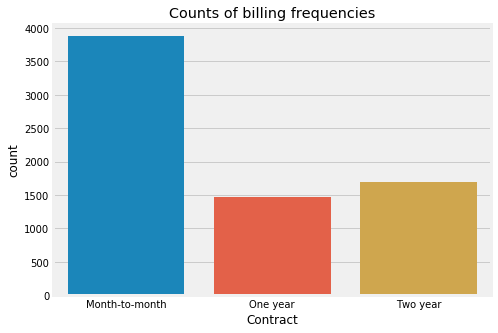

In [14]:
#counts of billing frequency or contacts
fig = plt.gcf()

fig.set_size_inches( 7, 5)
plt.title('Counts of billing frequencies')
sns.countplot(data['Contract']);


Most of the people have monthly billing cycle.

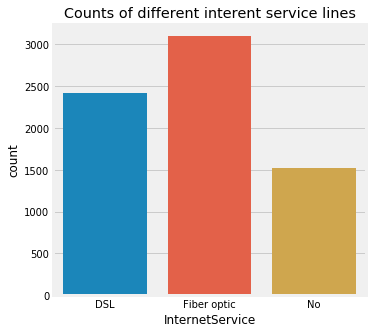

In [15]:
#Use of differnt Internet service lines
fig = plt.gcf()
fig.set_size_inches( 5, 5)
plt.title('Counts of different interent service lines')
sns.countplot(data['InternetService']);

Most of the people who have internet service uses fiber optic lines.

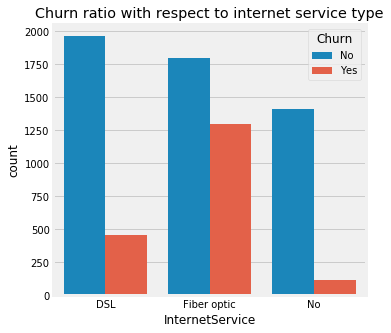

In [16]:
#Churn ratio with respect to internet service type
fig = plt.gcf()
plt.title('Churn ratio with respect to internet service type')
fig.set_size_inches( 5, 5)
sns.countplot(data['InternetService'],hue=data['Churn'])

People using Fiber optic line for internet have higher churn ratio as compared to having DSL line internet.

In [17]:
#counts of different bill payment methods using pie chart
target= data['PaymentMethod'].value_counts()
print(target)
levels = ['Electronic check','Mailed check','Bank transfer','Credit card']
trace = go.Pie(labels=target.index,values=target.values
               )
layout = dict(title="Telco Customer Payment Method", margin=dict(l=50), width=800, height=500)
figdata = [trace]

fig = go.Figure(data=figdata, layout=layout)
iplot(fig)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


Around one third customer use Electronic check to pay their telecom bills.

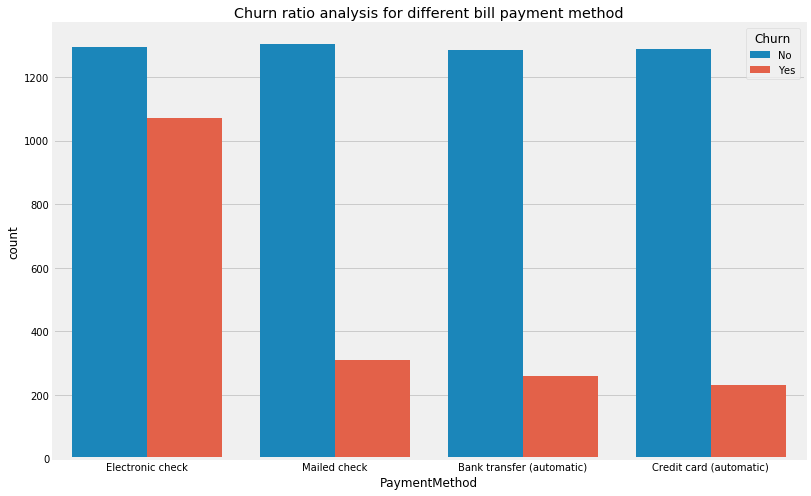

In [18]:
#Churn ratio analysis for different bill payment method
fig = plt.gcf()
fig.set_size_inches( 12, 8)
plt.title('Churn ratio analysis for different bill payment method')
sns.countplot(data['PaymentMethod'],hue=data['Churn']);

It is clear that churn ratio for people paying bill using Electronic check is much higher as compared to other payment methods.

In [19]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Here in above column OnlineSecurity, we can replace No internet service with No .Similar is the case with other columns like OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.

In [20]:
internet_features = ['OnlineSecurity','OnlineBackup' ,'DeviceProtection' ,
                     'TechSupport' ,'StreamingTV' ,'StreamingMovies','InternetService']

In [21]:
#replace No internet service with No
data[internet_features]=data[internet_features].replace('No internet service','No')

In [22]:
#let's verify it
data['OnlineSecurity'].value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [23]:
#churn ratio for column Online security
bar_plot('OnlineSecurity',data)

<class 'pandas.core.series.Series'>


Clearly churn ratio for customers not having online security feature is higher in comparison to those having it.

In [24]:
#Churn ratio for StreamingTV
bar_plot('StreamingTV',data)

<class 'pandas.core.series.Series'>


Churn ratio for people having Streaming TV service is higher as compared to those not having it.

In [25]:
#churn ratio for people having StreamingMovie service
bar_plot('StreamingMovies',data)

<class 'pandas.core.series.Series'>


Like StreamingTV, Churn ratio for people having StreamingMovies service is higher.It seems these two online services are major factor for churn.

In [26]:
#Churn ratio for feature tech support
bar_plot('TechSupport',data)

<class 'pandas.core.series.Series'>


People not having tech support have higher churn ratio as compared to having it. May be telecom company can provide some discount on tech support charges so that more customer can avail it.

In [27]:
#churn ratio for column onlinebackup
bar_plot('OnlineBackup',data)

<class 'pandas.core.series.Series'>


People who don't have online backup service have higher churn ratio as compared to people having it.

Text(0.5, 0, 'Churn')

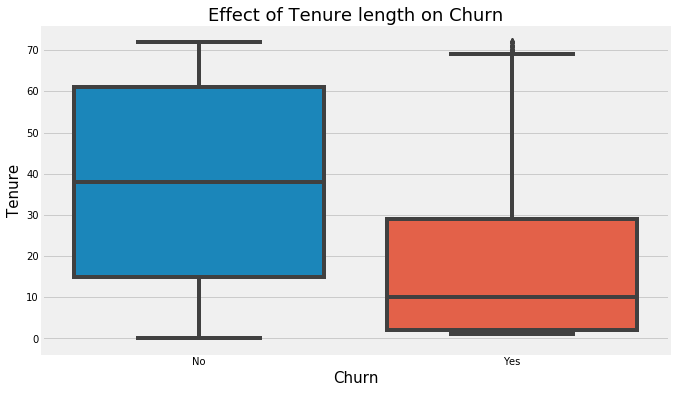

In [28]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'tenure', data=data)
ax.set_title('Effect of Tenure length on Churn', fontsize=18)
ax.set_ylabel('Tenure', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

It seems that customer churn in initial period more(over 10 months). Company must put some extra focus on new customers having tenure over 10 months.

Text(0.5, 0, 'Churn')

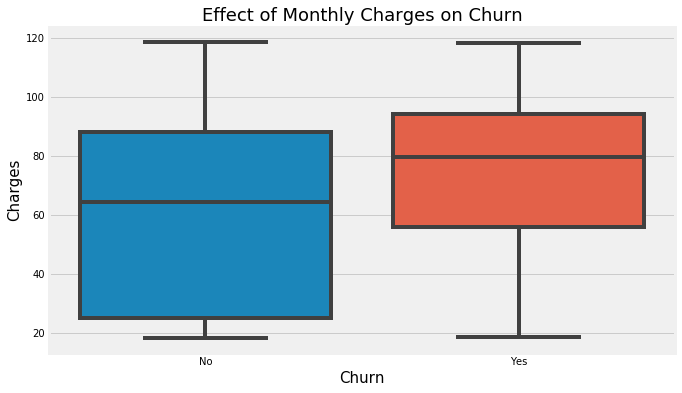

In [29]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'MonthlyCharges', data=data)
ax.set_title('Effect of Monthly Charges on Churn', fontsize=18)
ax.set_ylabel('Charges', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

Customer churning are paying more monthly charges as compared to non-churn customers.

### Feature engineering

In [30]:
data.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
         ...   
7013     3756.4
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019        826
7020        239
7021      727.8
7022     7544.3
7023     6479.4
7024    3626.35
7025     1679.4
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031     3316.1
7032      75.75
7033    2625.25
7034    6886.25
7035     1495.1
7036      743.3
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Leng

In [31]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.TotalCharges[:10]

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
5     820.50
6    1949.40
7     301.90
8    3046.05
9    3487.95
Name: TotalCharges, dtype: float64

In [32]:
#Let's check for nulls first

nulls = data.isnull().sum()
nulls[nulls > 0]

TotalCharges    11
dtype: int64

In [33]:
#impute missing values with 0
data.fillna(0,inplace=True)


In [34]:
#new feature - Internet(Yes- have internet service, No- do not have internet service)
data['Internet'] = data['InternetService'].apply(lambda x : x if x=='No' else 'Yes')

In [35]:
data['Internet'].value_counts()

Yes    5517
No     1526
Name: Internet, dtype: int64

In [36]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [37]:
#replace No phone service with No
data['MultipleLines'].replace('No phone service','No',inplace=True)

In [38]:
#train and target
y = data['Churn'].map({'Yes':1,'No':0})

X = data.drop(labels=['Churn','customerID'],axis=1).copy()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Internet
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Yes
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
pll_data = data.copy()

In [40]:
pll_data['ChurnNumerical'] = pll_data['Churn'].map({'Yes':1,'No':0})

In [41]:
pll_data.to_csv('TelcoChurnBasic.csv')

In [42]:
#find list of categorical columns for encoding
cat_cols = []
for column in X.columns:
    if column not in ['tenure','MonthlyCharges','TotalCharges']:
        cat_cols.append(column)

cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Internet']

In [43]:
#Convert categorical columns to binary
X= pd.get_dummies(X,columns=cat_cols)


In [44]:
#shape after conversion of categorical features
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Internet_No,Internet_Yes
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,1,0,1,0,0,0,0,1,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
